<a href="https://colab.research.google.com/github/Sukanya41455/Tensorflow_practice/blob/main/sparse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
st1 = tf.sparse.SparseTensor(indices=[[0,3],[2,4]],
                             values=[10,20],
                             dense_shape=[3,10])
print(st1)

SparseTensor(indices=tf.Tensor(
[[0 3]
 [2 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([10 20], shape=(2,), dtype=int32), dense_shape=tf.Tensor([ 3 10], shape=(2,), dtype=int64))


In [ ]:
def print_sparse_tensor(st):
  s= "Sparse Tensor shape=%s \n values={"%(st.dense_shape.numpy().tolist(),)
  for ind,val in zip(st.indices, st.values):
    s+= f"\n %s: %s" % (ind.numpy().tolist(), val.numpy().tolist())
  return s+"}>"


print(print_sparse_tensor(st1))

Sparse Tensor shape=[3, 10] 
 values={
 [0, 3]: 10
 [2, 4]: 20}>


In [ ]:
st2 = tf.sparse.from_dense([[1, 0, 0, 8], [0, 0, 0, 0], [0, 0, 3, 0]])
print(print_sparse_tensor(st2))

Sparse Tensor shape=[3, 4] 
 values={
 [0, 0]: 1
 [0, 3]: 8
 [2, 2]: 3}>


In [ ]:
print(st2)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 3]
 [2 2]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 8 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [ ]:
st3 = tf.sparse.to_dense(st2)
print(st3)

tf.Tensor(
[[1 0 0 8]
 [0 0 0 0]
 [0 0 3 0]], shape=(3, 4), dtype=int32)


In [ ]:
sta = tf.sparse.SparseTensor(indices=[[0,2],[3,4]],
                             values=[31,2],
                             dense_shape=[4,10])
stb = tf.sparse.SparseTensor(indices=[[0,2],[7,0]],
                             values=[56,38],
                             dense_shape=[4,10])
stsum = tf.sparse.add(sta,stb)
print(sta)
print(stb)
print(print_sparse_tensor(stsum))


SparseTensor(indices=tf.Tensor(
[[0 2]
 [3 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([31  2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([ 4 10], shape=(2,), dtype=int64))
SparseTensor(indices=tf.Tensor(
[[0 2]
 [7 0]], shape=(2, 2), dtype=int64), values=tf.Tensor([56 38], shape=(2,), dtype=int32), dense_shape=tf.Tensor([ 4 10], shape=(2,), dtype=int64))
Sparse Tensor shape=[4, 10] 
 values={
 [0, 2]: 87
 [3, 4]: 2
 [7, 0]: 38}>


In [ ]:
st_c = tf.sparse.SparseTensor(indices=([0, 1], [1, 0], [1, 1]),
                       values=[13, 15, 17],
                       dense_shape=(2,2))

print(st_c)
mb = tf.constant([[4],[6]])
print(mb)
product = tf.sparse.sparse_dense_matmul(st_c,mb)
print(product)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [1 1]], shape=(3, 2), dtype=int64), values=tf.Tensor([13 15 17], shape=(3,), dtype=int32), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64))
tf.Tensor(
[[4]
 [6]], shape=(2, 1), dtype=int32)
tf.Tensor(
[[ 78]
 [162]], shape=(2, 1), dtype=int32)


In [ ]:
sparse_pattern_A = tf.sparse.SparseTensor(indices = [[2,4], [3,3], [3,4], [4,3], [4,4], [5,4]],
                         values = [1,1,1,1,1,1],
                         dense_shape = [8,5])
sparse_pattern_B = tf.sparse.SparseTensor(indices = [[0,2], [1,1], [1,3], [2,0], [2,4], [2,5], [3,5], 
                                              [4,5], [5,0], [5,4], [5,5], [6,1], [6,3], [7,2]],
                         values = [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                         dense_shape = [8,6])
sparse_pattern_C = tf.sparse.SparseTensor(indices = [[3,0], [4,0]],
                         values = [1,1],
                         dense_shape = [8,6])
print(tf.sparse.to_dense(sparse_pattern_A))
print(tf.sparse.to_dense(sparse_pattern_B))
print(tf.sparse.to_dense(sparse_pattern_C))
sparse_patt_list = [sparse_pattern_A, sparse_pattern_B,sparse_pattern_C]
sparse_pattern = tf.sparse.concat(axis=1, sp_inputs= sparse_patt_list)
print(tf.sparse.to_dense(sparse_pattern))

tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(8, 5), dtype=int32)
tf.Tensor(
[[0 0 1 0 0 0]
 [0 1 0 1 0 0]
 [1 0 0 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [1 0 0 0 1 1]
 [0 1 0 1 0 0]
 [0 0 1 0 0 0]], shape=(8, 6), dtype=int32)
tf.Tensor(
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]], shape=(8, 6), dtype=int32)
tf.Tensor(
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]], shape=(8, 17), dtype=int32)


In [ ]:
sliceA = tf.sparse.slice(sparse_pattern_A,start=[0,0], size=[8,5])
sliceB = tf.sparse.slice(sparse_pattern_B,start=[0,5], size=[8,6])
sliceC = tf.sparse.slice(sparse_pattern_C,start=[0,10], size=[8,6])
print('---',tf.sparse.to_dense(sliceA))
print('---',tf.sparse.to_dense(sliceB))
print('---',tf.sparse.to_dense(sliceC))

--- tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(8, 5), dtype=int32)
--- tf.Tensor(
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]], shape=(8, 1), dtype=int32)
--- tf.Tensor([], shape=(8, 0), dtype=int32)


In [ ]:
print(tf.sparse.to_dense(st2))
st2plus5 = tf.sparse.map_values(tf.add, st2,5)
print(tf.sparse.to_dense(st2plus5))

tf.Tensor(
[[1 0 0 8]
 [0 0 0 0]
 [0 0 3 0]], shape=(3, 4), dtype=int32)
tf.Tensor(
[[ 6  0  0 13]
 [ 0  0  0  0]
 [ 0  0  8  0]], shape=(3, 4), dtype=int32)


In [ ]:
st2plus5 = tf.sparse.SparseTensor(
    st2.indices,
    st2.values+5,
    st2.dense_shape
)
print(tf.sparse.to_dense(st2plus5))

tf.Tensor(
[[ 6  0  0 13]
 [ 0  0  0  0]
 [ 0  0  8  0]], shape=(3, 4), dtype=int32)


In [ ]:
# USING TENSORFLOW
#  If you use sparse tensors in tf.keras.layers.Dense layers 
# in your model, they will output dense tensors.
x = tf.keras.Input(shape=(4,), sparse=True)  # 4D vectors
y = tf.keras.layers.Dense(4)(x)
model = tf.keras.Model(x,y)

sparse_data = tf.sparse.SparseTensor(
    indices = [(0,0),(0,1),(0,2),
               (4,3),(5,0),(5,1)],
    values = [1,1,1,1,1,1],
    dense_shape = (6,4)
)
print(tf.sparse.to_dense(sparse_data))
model(sparse_data)
model.predict(sparse_data)

tf.Tensor(
[[1 1 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 1 0 0]], shape=(6, 4), dtype=int32)


array([[ 0.10776049, -0.90858394,  1.35728   ,  0.5384642 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.3960474 , -0.5116656 ,  0.06292123,  0.5255323 ],
       [ 0.9533864 , -0.96518743,  1.0438819 ,  0.12353224]],
      dtype=float32)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(sparse_data)
for element in dataset:
  print(tf.sparse.to_dense(element))
for element in dataset:
  print(print_sparse_tensor(element))

tf.Tensor([1 1 1 0], shape=(4,), dtype=int32)
tf.Tensor([0 0 0 0], shape=(4,), dtype=int32)
tf.Tensor([0 0 0 0], shape=(4,), dtype=int32)
tf.Tensor([0 0 0 0], shape=(4,), dtype=int32)
tf.Tensor([0 0 0 1], shape=(4,), dtype=int32)
tf.Tensor([1 1 0 0], shape=(4,), dtype=int32)
Sparse Tensor shape=[4] 
 values={
 [0]: 1
 [1]: 1
 [2]: 1}>
Sparse Tensor shape=[4] 
 values={}>
Sparse Tensor shape=[4] 
 values={}>
Sparse Tensor shape=[4] 
 values={}>
Sparse Tensor shape=[4] 
 values={
 [3]: 1}>
Sparse Tensor shape=[4] 
 values={
 [0]: 1
 [1]: 1}>


In [ ]:
batched_dataset = dataset.batch(2)
for element in batched_dataset:
  print(tf.sparse.to_dense(element))
for element in batched_dataset:
  print(print_sparse_tensor(element))

tf.Tensor(
[[1 1 1 0]
 [0 0 0 0]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[0 0 0 0]
 [0 0 0 0]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[0 0 0 1]
 [1 1 0 0]], shape=(2, 4), dtype=int32)
Sparse Tensor shape=[2, 4] 
 values={
 [0, 0]: 1
 [0, 1]: 1
 [0, 2]: 1}>
Sparse Tensor shape=[2, 4] 
 values={}>
Sparse Tensor shape=[2, 4] 
 values={
 [0, 3]: 1
 [1, 0]: 1
 [1, 1]: 1}>


In [ ]:
@tf.function
def f(x,y):
  return tf.sparse.sparse_dense_matmul(x,y)

a = tf.sparse.SparseTensor(
    indices=[[0,3],[2,4]],
    values=[15,25],
    dense_shape=[3,10]
)
b = tf.sparse.to_dense(tf.sparse.transpose(a))
print('a', tf.sparse.to_dense(a))
print('transpose', tf.sparse.transpose(a))
print('b',b)
c = f(a,b)
print(c)

a tf.Tensor(
[[ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0]], shape=(3, 10), dtype=int32)
transpose SparseTensor(indices=tf.Tensor(
[[3 0]
 [4 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([15 25], shape=(2,), dtype=int32), dense_shape=tf.Tensor([10  3], shape=(2,), dtype=int64))
b tf.Tensor(
[[ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]
 [15  0  0]
 [ 0  0 25]
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]], shape=(10, 3), dtype=int32)
tf.Tensor(
[[225   0   0]
 [  0   0   0]
 [  0   0 625]], shape=(3, 3), dtype=int32)


In [ ]:
print(tf.sparse.reduce_max(tf.sparse.from_dense([-5,0,-3])))

tf.Tensor(-3, shape=(), dtype=int32)


In [ ]:
print(tf.math.reduce_max([-5,0,-3]))

tf.Tensor(0, shape=(), dtype=int32)


TENSORS

In [ ]:
x = tf.constant([[1,2,3],[4,5,6]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
(2, 3)
<dtype: 'int32'>


In [ ]:
print(x+x)
print(5*x)

tf.Tensor(
[[ 2  4  6]
 [ 8 10 12]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 5 10 15]
 [20 25 30]], shape=(2, 3), dtype=int32)


In [ ]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]], dtype=int32)>

In [ ]:
tf.concat([x,x,x],axis=0)

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
tf.concat([x,x,x],axis=1)

<tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6, 4, 5, 6]], dtype=int32)>

In [ ]:
tf.nn.softmax(x, axis=-1)

InvalidArgumentError: ignored

In [ ]:
if tf.config.list_physical_devices('GPU'):
  print('present')
else:
  print('no')

no


In [ ]:
# Normal tf.Tensor objects are immutable. To store model weights 
# (or other mutable state) in TensorFlow use a tf.Variable.
var = tf.Variable([0.0, 0.0, 0.0])
var.assign([1,2,3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
var.assign_add([1,1,1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [ ]:
x = tf.Variable(1.0)
def f(x):
  y = x**2 + 2*x -5
  return y
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [ ]:
with tf.GradientTape() as tape:
  y = f(x)
gx = tape.gradient(y,x) #g(x)=dy/dx
gx

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [ ]:
@tf.function
def my_func(x):
  return tf.reduce_sum(x)
my_func(tf.constant([1,2,3]))

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [ ]:
my_func(tf.constant([12,3]))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [ ]:
my_func(tf.constant([10.0,9.1,8.2], dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [ ]:
# tf.Module  is a class for managing your tf.Variable objects, and the tf.function objects that operate on them. 
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self,x):
    return x* self.weight

mod = MyModule(3)
mod.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [ ]:
tf.saved_model.save(mod, './saved')

INFO:tensorflow:Assets written to: ./saved/assets


In [ ]:
reloaded = tf.saved_model.load('./saved')
reloaded.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = [9,6]

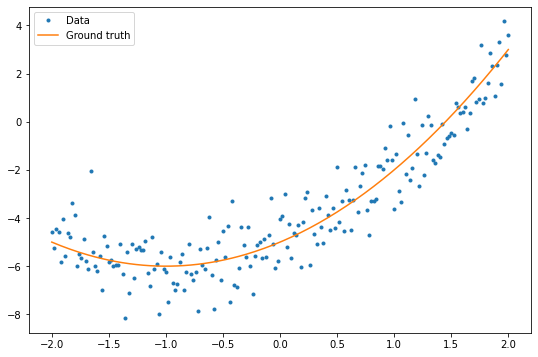

In [ ]:
x = tf.linspace(-2,2,201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x -5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [ ]:
class Model(tf.keras.Model):
  def __init__(self,units):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(units=units,
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal)
    self.dense2 = tf.keras.layers.Dense(1)

  def call(self, x, training=True):
    x = x[:, tf.newaxis]
    x = self.dense1(x)
    x =  self.dense2(x)
    return tf.squeeze(x,axis=1)

model = Model(64)

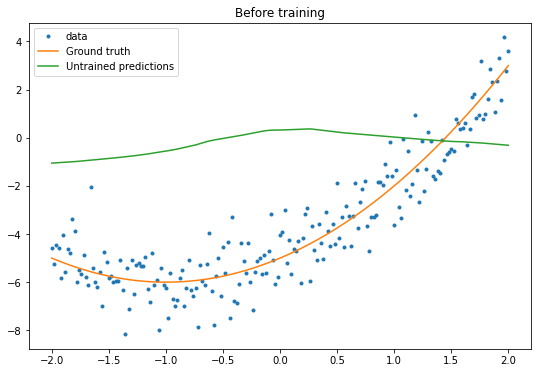

In [ ]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();


In [ ]:
variables = model.variables
optimizer = tf.optimizers.SGD(learning_rate=0.01)
print('x',x)
# print('y',y)
for step in range(1000):
  with tf.GradientTape() as tape:
    prediction = model(x)
    # print(prediction)
    error = (y-prediction)**2
    mean_error = tf.reduce_mean(error)
  gradient = tape.gradient(mean_error, variables)
  optimizer.apply_gradients(zip(gradient, variables))

  if step % 100 == 0:
    print(f'Mean squared error: {mean_error.numpy():0.3f}')

x tf.Tensor(
[-2.   -1.98 -1.96 -1.94 -1.92 -1.9  -1.88 -1.86 -1.84 -1.82 -1.8  -1.78
 -1.76 -1.74 -1.72 -1.7  -1.68 -1.66 -1.64 -1.62 -1.6  -1.58 -1.56 -1.54
 -1.52 -1.5  -1.48 -1.46 -1.44 -1.42 -1.4  -1.38 -1.36 -1.34 -1.32 -1.3
 -1.28 -1.26 -1.24 -1.22 -1.2  -1.18 -1.16 -1.14 -1.12 -1.1  -1.08 -1.06
 -1.04 -1.02 -1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82
 -0.8  -0.78 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58
 -0.56 -0.54 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34
 -0.32 -0.3  -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1
 -0.08 -0.06 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14
  0.16  0.18  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38
  0.4   0.42  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62
  0.64  0.66  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86
  0.88  0.9   0.92  0.94  0.96  0.98  1.    1.02  1.04  1.06  1.08  1.1
  1.12  1.14  1.16  1.18  1.2   1.22  1.2

In [ ]:
import tensorflow as tf
tf.random.uniform(shape=[2],minval=1,maxval=3,dtype=tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [ ]:
tf.random.set_seed(5)
tf.random.uniform(shape=[],maxval=3,dtype=tf.int32,seed=10)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
# tf.tile
a = tf.constant([[1,2,3],[4,5,6]],tf.int32)
b = tf.constant([1,2],tf.int32)
tf.tile(a,b)

c = tf.constant([2,1],tf.int32)
tf.tile(a,c)

d = tf.constant([2,2],tf.int32)
tf.tile(a,d)

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6],
       [1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]], dtype=int32)>

In [ ]:
tf.eye(2) # identity matrix
tf.eye(2, num_columns=3) # 2x3
batch_identity = tf.eye(2,batch_shape=[3]) # batch of 3 identity matrix 2x2
batch_identity

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]], dtype=float32)>

In [ ]:
tf.tile(tf.eye(2),[5,5])[:2,:2]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

In [ ]:
# regularizers
from tensorflow.keras import layers
from tensorflow.keras import regularizers

layer = layers.Dense(
    units=64,
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
)

In [ ]:
layer = layers.Dense(units=5,
                     kernel_initializer='ones',
                     kernel_regularizer=regularizers.L1(0.01),
                     activity_regularizer=regularizers.L2(0.01))
tensor = tf.ones(shape=(5,5))*2.0
out = layer(tensor)
print(layer.losses)
print(tf.math.reduce_sum(layer.losses))

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25>]
tf.Tensor(5.25, shape=(), dtype=float32)


In [ ]:
# tf.sequence_mask - returns a mask tensor rep 1st n pos of ech cell
tf.sequence_mask(lengths=[1,3,2],maxlen=6)
tf.sequence_mask([[1,3],[2,0]])

<tf.Tensor: shape=(2, 2, 3), dtype=bool, numpy=
array([[[ True, False, False],
        [ True,  True,  True]],

       [[ True,  True, False],
        [False, False, False]]])>

In [ ]:
# tf.where - return non-zero
print(tf.where([True,False,False,True]).numpy())
print(tf.where([[1,0,0],[1,0,1]]).numpy()) # 2axis int vector with 3 non zero val, shape=[3,2]

[[0]
 [3]]
[[0 0]
 [1 0]
 [1 2]]


In [ ]:
float_tensor = [[[0.1, 0], [0, 2.2], [3.5, 1e6]],
                [[0,   0], [0,   0], [99,    0]]]
print(tf.where(float_tensor).numpy())

[[0 0 0]
 [0 1 1]
 [0 2 0]
 [0 2 1]
 [1 2 0]]


In [ ]:
sparse = tf.sparse.from_dense(float_tensor)
sparse.indices.numpy()

array([[0, 0, 0],
       [0, 1, 1],
       [0, 2, 0],
       [0, 2, 1],
       [1, 2, 0]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np

model = Sequential()
# input_dim= vocab size, output_dim=len of vec for each word, ip_len=max len of a seq
emd = Embedding(input_dim=10, output_dim=4,input_length=2)
model.add(emd)
model.compile('adam','mse')

input_data = np.array([[1,2]])
pred = model.predict(input_data)
print(input_data.shape, input_data)
print(pred)
print(emd.get_weights())
# `embeddings` has a shape of (num_vocab, embedding_dim) 


(1, 2) [[1 2]]
[[[ 0.04896894 -0.01071317  0.0486864   0.0249696 ]
  [-0.03820563  0.02573908 -0.00754292  0.01746018]]]
[array([[-0.02982046, -0.01529288, -0.04444498, -0.0058744 ],
       [ 0.04896894, -0.01071317,  0.0486864 ,  0.0249696 ],
       [-0.03820563,  0.02573908, -0.00754292,  0.01746018],
       [-0.0266137 ,  0.03024316, -0.04497806,  0.03336683],
       [-0.04050327,  0.00158821,  0.01736374, -0.02231138],
       [-0.00035589,  0.0311137 , -0.02425152,  0.04963937],
       [-0.03750204, -0.04537165,  0.02166006, -0.0100768 ],
       [ 0.03490492, -0.03113943, -0.03891115,  0.04793649],
       [-0.02136333,  0.00531115, -0.04030733, -0.02414421],
       [-0.00019398,  0.04354678, -0.04987205, -0.03746096]],
      dtype=float32)]


In [ ]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]

labels = array([1,1,1,1,1,0,0,0,0,0])
vocab_size = 50
encoded_reviews = [one_hot(d,vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

model = Sequential()
embd = Embedding(input_dim=vocab_size,output_dim=8,input_length=max_length)
model.add(embd)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

print(model.summary())
print(len(embd.get_weights()[0][0]), len(embd.get_weights()[0]))

encoded reviews: [[40, 36, 20], [27, 19], [2, 14], [45, 17], [27, 17], [38], [38, 33], [15], [37, 44], [48, 44, 49, 44]]
[[40 36 20  0]
 [27 19  0  0]
 [ 2 14  0  0]
 [45 17  0  0]
 [27 17  0  0]
 [38  0  0  0]
 [38 33  0  0]
 [15  0  0  0]
 [37 44  0  0]
 [48 44 49 44]]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
8 50


In [ ]:
model.fit(padded_reviews,labels,epochs=100,verbose=0)

In [ ]:
print(embd.get_weights()[0].shape)
print(embd.get_weights()[0][0])

(50, 8)
[ 0.08912646  0.1435917  -0.13041191 -0.08259299  0.07480287 -0.08749638
 -0.09444305  0.14504045]


In [ ]:
import tensorflow as tf
spec = tf.TensorSpec(shape=[8,3], dtype=tf.int32, name="OriginalName")
print(spec)
tf.TensorSpec.from_spec(spec, "NewName")

TensorSpec(shape=(8, 3), dtype=tf.int32, name='OriginalName')


TensorSpec(shape=(8, 3), dtype=tf.int32, name='NewName')

In [ ]:
tf.TensorSpec.from_tensor(tf.constant([1,2,3]))

TensorSpec(shape=(3,), dtype=tf.int32, name=None)

In [ ]:
import tensorflow as tf
from numpy import array
from tf.keras.precessing.sequence import pad_sequences

# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(docs)
vocab = len(t.word_index)+1
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
max_len=4
padded_docs = pad_sequences(encoded_docs,maxlen=max_len,padding='post')
print(padded_docs)

In [ ]:
# CONCATENATE
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np


In [ ]:
x = np.arange(20).reshape(2,2,5)
print(x)
y = np.arange(20,30).reshape(2,1,5)
print('--------')
print(y)
print('----------')
tf.keras.layers.concatenate([x,y],axis=1)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]]
--------
[[[20 21 22 23 24]]

 [[25 26 27 28 29]]]
----------


<tf.Tensor: shape=(2, 3, 5), dtype=int64, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [20, 21, 22, 23, 24]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [25, 26, 27, 28, 29]]])>

AttributeError: ignored

In [3]:
import pandas as pd

a = pd.DataFrame({0:[1,2,3],1:[10,20,30]})
b = pd.DataFrame({0:[0,1,2,3],1:[0,1,20,3]})
print(a)
print('-----')
print(b)
print('-----')

# match_ident = []
# for i in range(0,len(a)):
#     found=False
#     for j in range(0,len(b)):
#         if a[0][i]==b[0][j]:
#             if a[1][i]==b[1][j]:
#                 found=True
#     match_ident.append(not(found))

# a = a[match_ident]
# print(a)
print(pd.merge(a,b, indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))

   0   1
0  1  10
1  2  20
2  3  30
-----
   0   1
0  0   0
1  1   1
2  2  20
3  3   3
-----
   0   1
0  1  10
2  3  30


In [8]:
import tensorflow as tf

class Foo(object):
  def __init__(self):
    self.a = tf.Variable(1)
    self.b = tf.constant(2)
    self.c = tf.convert_to_tensor('hello there')

  @tf.function
  def bar(self, partial):
    packed = tf.raw_ops.Pack(values=[self.a, self.b])
    static_val = tf.get_static_value(packed, partial=partial)
    tf.print(static_val)

  @tf.function
  def bar2(self):
    print(self.b)
    print(tf.get_static_value(self.b))

  @tf.function
  def bar3(self):
    print(self.c)
    print(tf.get_static_value(self.c))

f = Foo()
f.bar2()  # `array([None, array(2, dtype=int32)], dtype=object)`
# f.bar2(partial=False)  # `None`
f.bar3()

tf.Tensor(2, shape=(), dtype=int32)
2
tf.Tensor(b'hello there', shape=(), dtype=string)
b'hello there'
